# Sentiment Classification on E-Commerce Women Review Data to Predict Recommendation or Non-Recommendation of  Products (2023)
 

# Dependencies 

In [2]:
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings

import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as panda
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import plotly.express as pltx
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from imblearn.over_sampling import RandomOverSampler


from sklearn.impute import SimpleImputer
panda.set_option('max_colwidth', 200)
panda.set_option('display.max_rows', 1000)
panda.set_option('display.max_columns', 200)
panda.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set()
DIMS=(20, 10)


[nltk_data] Downloading package stopwords to /home/humna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/humna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/humna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/humna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/humna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
data = panda.read_csv("WomensClothingECommerceReviews.csv", index_col=0)

# Data Description

In [4]:
def print_data_set_info(data_set):
    """ 
        This function will print the basic information of dataset
        No of columns and rows
        Missing Values columns
    """  
    print("General Information of dataset is : ",'\n')
    print("There are {} columns".format(data.shape[1]), "and {} rows.".format(data.shape[0]),'\n')
    print("Data type of columns are : ",'\n',data_set.dtypes,'\n')

    print("Columns with Missing Values:\n", data_set.isnull().sum(),'\n')
    print("Data Set Descriptions: \n :",data_set.describe())
    data_set.sample(5)
    return True


"""
    Function Calling for data description
"""

print_data_set_info(data)

General Information of dataset is :  

There are 10 columns and 23486 rows. 

Data type of columns are :  
 Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object 

Columns with Missing Values:
 Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64 

Data Set Descriptions: 
 :        Clothing ID      Age   Rating  Recommended IND  Positive Feedback Count
count     23486.00 23486.00 23486.00         23486.00            

True

# Data Processing

There are 10 columns and 23486 rows. 

Columns with Missing Values: 
 Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64 

Columns with Missing Values after handle missing values: 
 Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64 

[1 0]


To address class imbalance in a dataset for text classification, it is important to check the proportion of the target class variable. By examining the distribution of classes, you can identify if there is a significant imb

0                                                                                                                                                      Absolutely wonderful - silky and sexy and comfortable
1    Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...
2    I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
3                                                                               I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!
4           This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any card

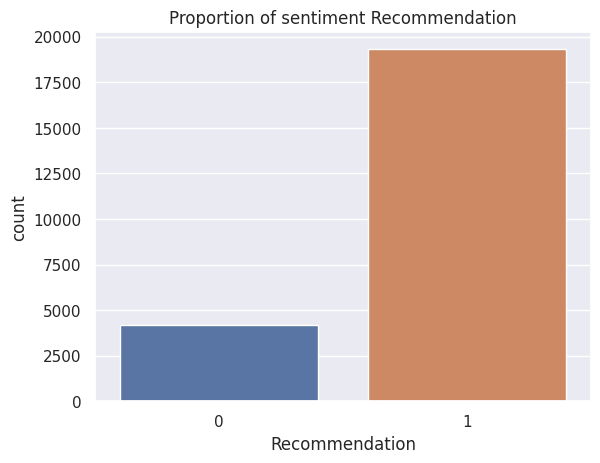

In [5]:
def missing_value_handles(df):
    """    
    handel data rows of missing Values
    """
    imputer_review_text = SimpleImputer(strategy="constant")
    print("There are {} columns".format(df.shape[1]), "and {} rows.".format(df.shape[0]),'\n')
    
    print("Columns with Missing Values: \n", df.isnull().sum(),'\n')
    
    df["Review Text"] = imputer_review_text.fit_transform(df[["Review Text"]])
    df["Recommended IND"] = imputer_review_text.fit_transform(df[["Recommended IND"]])
    df["Department Name"] = imputer_review_text.fit_transform(df[["Department Name"]])
    df["Division Name"] = imputer_review_text.fit_transform(df[["Division Name"]])
    df["Title"] = imputer_review_text.fit_transform(df[["Title"]])

    df["Class Name"] = imputer_review_text.fit_transform(df[["Class Name"]])
    print("Columns with Missing Values after handle missing values: \n", df.isnull().sum(),'\n')

    return df

def check_data_balance_recommendation(data_set):
    """
    The function will check the pedict data column balance
    """
    print(data_set['Recommended IND'].unique())

    print("\n\nTo address class imbalance in a dataset for text classification,"+
          " it is important to check the proportion of the target class variable."+
          " By examining the distribution of classes, you can identify if there is a significant imbalance,"+
          " where one class has substantially fewer samples compared to the other class(es)."+
          " This analysis helps determine the need for class imbalance mitigation techniques such as"+
          " upsampling or downsampling.")
    print(data['Recommended IND'].value_counts()
         )
    sns.countplot(x='Recommended IND',data=data_set)
    plt.xlabel('Recommendation')
    plt.title('Proportion of sentiment Recommendation');
    print("\n\n")
    print("The target class variable exhibits an imbalanced distribution,"+
          " with a higher prevalence of 'Recommended' values compared to 'Not Recommendation' values.")
    return True

def check_data_balance_rating(data_set):
    """
    The function will check the pedict data column balance
    """
    print(data_set['Rating'].unique())

    print("\n\nTo address class imbalance in a dataset for text classification,"+
          " it is important to check the proportion of the target class variable."+
          " By examining the distribution of classes, you can identify if there is a significant imbalance,"+
          " where one class has substantially fewer samples compared to the other class(es)."+
          " This analysis helps determine the need for class imbalance mitigation techniques such as"+
          " upsampling or downsampling.")
    print(data['Rating'].value_counts()
         )
    sns.countplot(x='Rating',data=data_set)
    plt.xlabel('Rating')
    plt.title('Proportion of sentiment Rating');
    print("\n\n")
    print("The target class variable exhibits an imbalanced distribution,"+
          " with a higher prevalence of 'Recommended' values compared to 'Not Recommendation' values.")
    return True



"""
    Function Calling
"""
data = missing_value_handles(data)
check_data_balance_recommendation(data)
data['Review Text'].head()


[4 5 3 2 1]


To address class imbalance in a dataset for text classification, it is important to check the proportion of the target class variable. By examining the distribution of classes, you can identify if there is a significant imbalance, where one class has substantially fewer samples compared to the other class(es). This analysis helps determine the need for class imbalance mitigation techniques such as upsampling or downsampling.
5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64



The target class variable exhibits an imbalanced distribution, with a higher prevalence of 'Recommended' values compared to 'Not Recommendation' values.


True

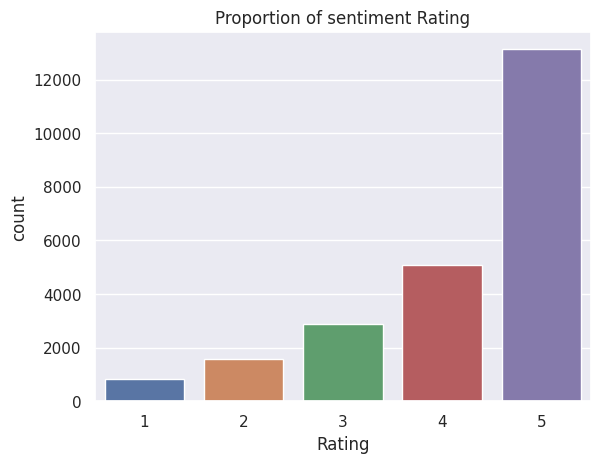

In [6]:
check_data_balance_rating(data)


### Word CLoud before Text processing

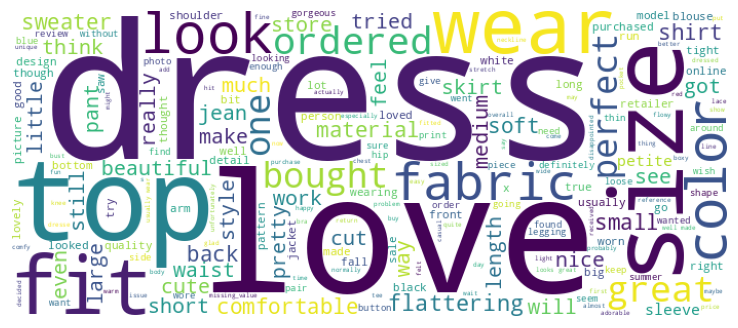

In [7]:

plt.subplots(figsize=(15,4))
review_data_words_set = data['Review Text']
cloud_of_words = WordCloud(background_color='white', width=700, height=300)\
                .generate(" ".join(review_data_words_set))
plt.imshow(cloud_of_words)
plt.axis('off')
plt.show()


### Apply Text Processing Steps

In [8]:
from nltk.stem.porter import PorterStemmer

def stopwordsfilter(df):
    """
    The function will remove the stop words , clothes realted word list 
    """
    clothes =set(['jumpsuit','dress','color','wear','top','sweater','material','shirt','jeans',
                  'pant','lehgth','skirt','order','white','black','fabric','blouse','sleeve','even', 
                  'jacket','bottom','legging','pocket','neckline'])
    stop_words = set(stopwords.words("english"))
    df["Review Text"] = df["Review Text"].apply(lambda x: [word for word in x if word not in stop_words])
    df["Review Text"] = df["Review Text"].apply(lambda x: [word for word in x if word not in clothes])
    return df

def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':
            new_string.append(tup[0])  
    return ' '.join(new_string)

#Remove Punctuation
data["Review Text"] = data["Review Text"].apply(lambda x: re.sub(r"[^a-zA-Z]", " ", str(x)))

#Convert Into lower case
data["Review Text"] = data["Review Text"].apply(lambda x: x.lower())

#Spit into words arrays
data["Review Text"] = data["Review Text"].apply(lambda x: x.split())

#Remove Stop Words
data = stopwordsfilter(data)

#Normalization
lemmatizer = WordNetLemmatizer()
data["Review Text"] = data["Review Text"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#Join array of words with space
data["Review Text"] = data["Review Text"].apply(lambda x: " ".join(x))

#REmove words which are not adjective and verbs
data['Review Text'] = data['Review Text'].apply(adj_collector)

#join the list of words
data["Review Text"] = data["Review Text"].apply(lambda x: "".join(x))


data['Review Text'].head()


0                                                                                                                 wonderful silky comfortable
1                                                                      love happened find ordered online bought petite hit little true petite
2    high wanted ordered petite small usual found small small zip reordered petite overall comfortable fit half tight several cheap net major
3                                                                                                              love flirty fabulous get great
4                                                                               flattering due adjustable perfect legging sleeveless cardigan
Name: Review Text, dtype: object

### Word cloud after apply text mining

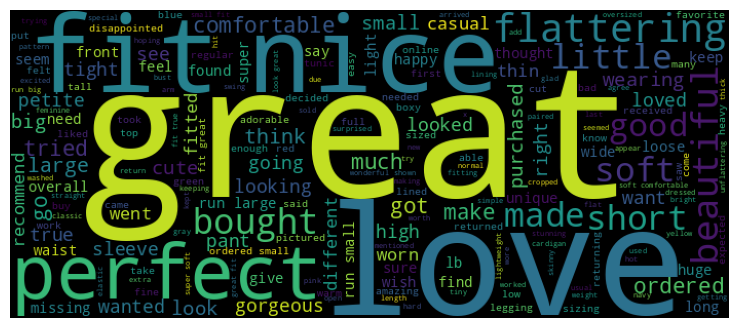

In [9]:
plt.subplots(figsize=(15,4))
cloud_of_words = WordCloud(background_color='black', width=700, height=300).generate(" ".join(data['Review Text']))
plt.imshow(cloud_of_words)
plt.axis('off')
plt.show()

# Exploratory Data Analysis

In [10]:
data.describe(include=object).T


count unique            top   freq
Title            23486  13994  missing_value   3810
Review Text      23486  22432        missing    845
Division Name    23486      4        General  13850
Department Name  23486      7           Tops  10468
Class Name       23486     21        Dresses   6319

## Correlation heatmap

/tmp/ipykernel_37948/4073165263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


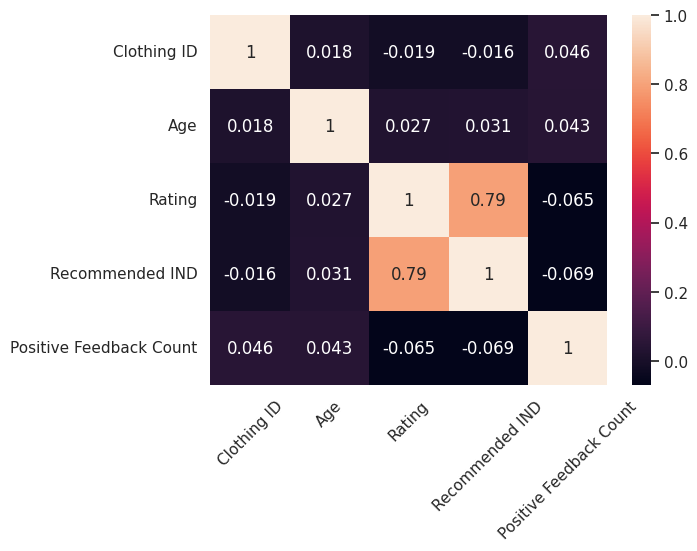

In [11]:


sns.heatmap(data.corr(), annot=True)

plt.xticks(rotation=45);


## Distribution of Reviews By Age

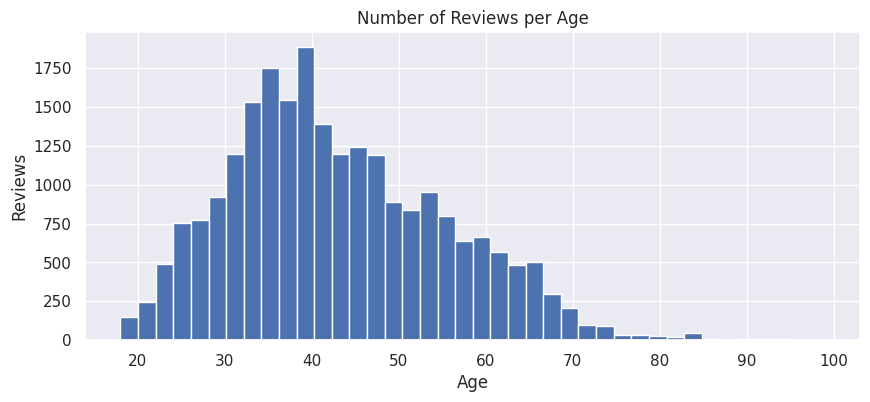

In [12]:
sns.set(rc={'figure.figsize':(10,4)})
plt.hist(data.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of Reviews per Age');

## Distribution of Reviews By Rating

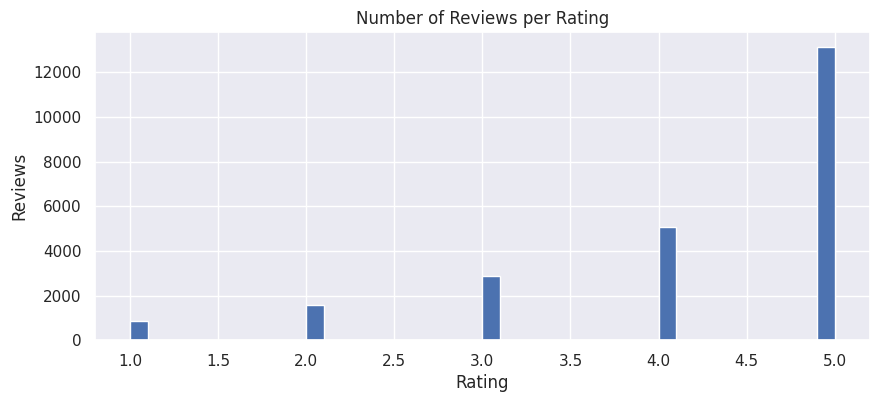

In [13]:
sns.set(rc={'figure.figsize':(10,4)})
plt.hist(data.Rating, bins=40)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Number of Reviews per Rating');

## Distribution of Reviews By Class Name

In [14]:
pltx.histogram(data, x = data['Class Name'])


## Lenght of Reviews

In [15]:
data['length'] = data['Review Text'].apply(len)
data.head()

Clothing ID  Age                    Title  \
0          767   33            missing_value   
1         1080   34            missing_value   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                                                                                                                Review Text  \
0                                                                                                               wonderful silky comfortable   
1                                                                    love happened find ordered online bought petite hit little true petite   
2  high wanted ordered petite small usual found small small zip reordered petite overall comfortable fit half tight several cheap net major   
3                                                                                                            love flirty fabulous get great   
4                                                                             flattering due adjustable perfect legging sleeveless cardigan   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  length  
0        Intimate  Intimates      27  
1         Dresses    Dresses      70  
2         Dresses    Dresses     136  
3         Bottoms      Pants      30  
4            Tops    Blouses      61

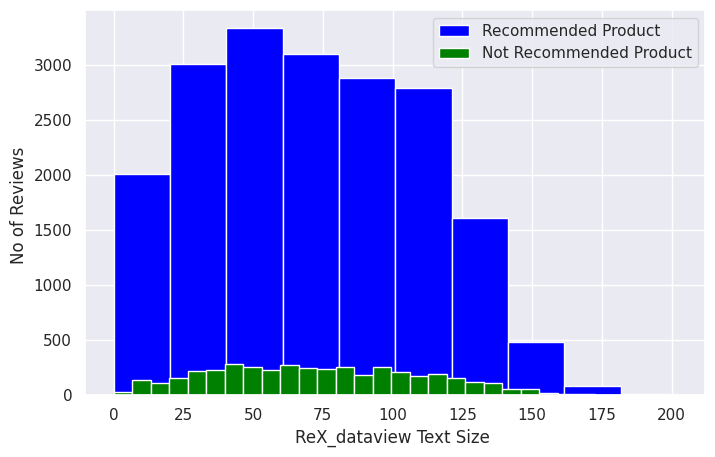

In [16]:
plt.figure(figsize=(8, 5))
data[data['Recommended IND'] == 1].length.plot(kind='hist', color='blue', label='Recommended Product')
data[data['Recommended IND'] == 0].length.plot(bins=30, kind='hist', color='green', label='Not Recommended Product')
plt.legend()
plt.xlabel("ReX_dataview Text Size ");
plt.ylabel("No of Reviews ");

# Data Preprocessing

We are focussing on Recommende IND and Review Text field for current analysis so we will drop other columns

In [17]:
data.head(3)
data.drop(['Clothing ID', 'Age', 'Title',
       'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1, inplace=True)
data = data.rename(columns={"Recommended IND": "class", "Review Text": "review"})


In [18]:
reco_words_list = data[data['class'] == 1]

no_reco_words_list = data[data['class'] == 1]

recommended_words =[]

for review in reco_words_list.review:
    recommended_words.append(review) 
recommended_words = ' '.join(recommended_words)
recommended_words[:48]


no_recommended_words = []

for review in no_reco_words_list.review:
    no_recommended_words.append(review)
no_recommended_words = ' '.join(no_recommended_words)


## Word cloud of Recommended data set

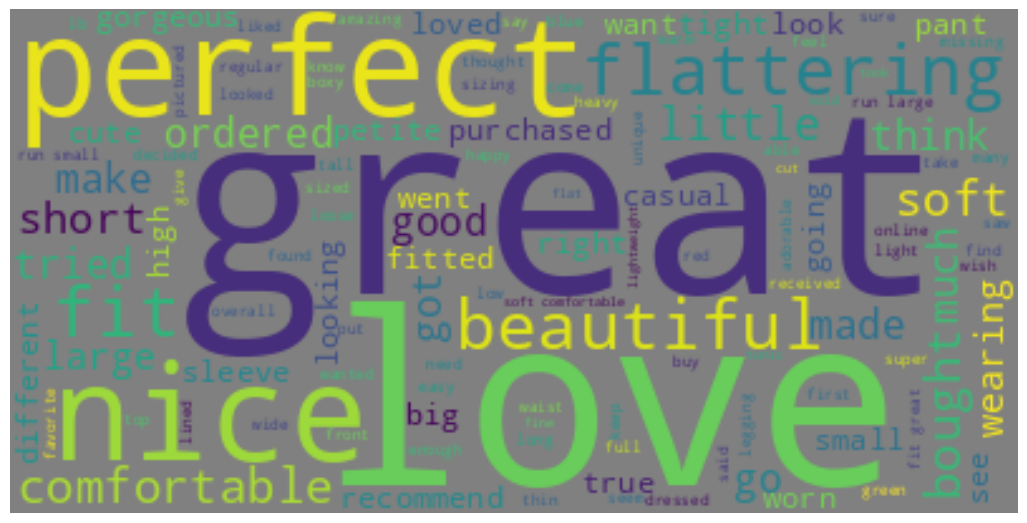

In [19]:
recommended_word_cloud = WordCloud(background_color="grey", max_words=len(recommended_words))

recommended_word_cloud.generate(recommended_words)

plt.figure(figsize=(13,13))
plt.imshow(recommended_word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word cloud of  No-Recommended data set

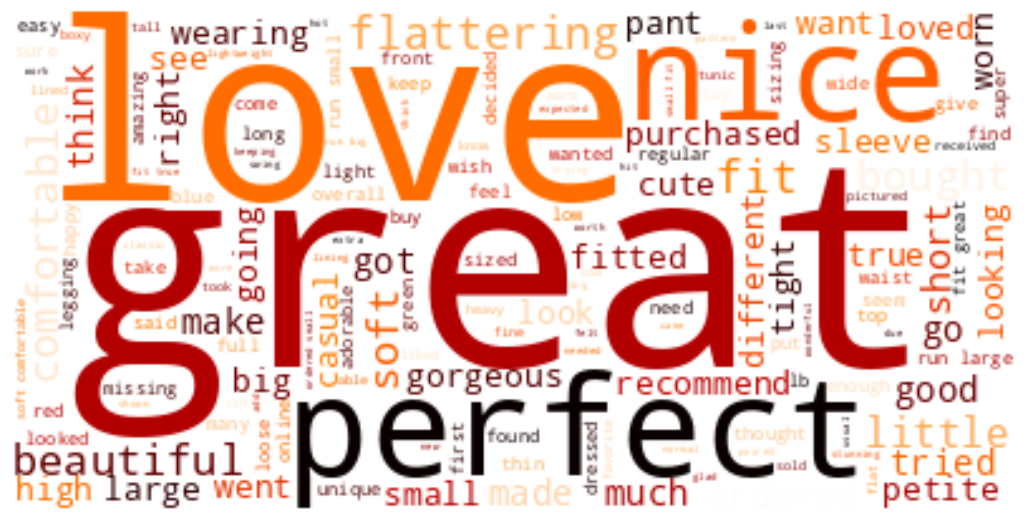

In [20]:
no_recommended_word_cloud = WordCloud(background_color="white", max_words=len(no_recommended_words), 
                                      colormap='gist_heat')

no_recommended_word_cloud.generate(no_recommended_words)

plt.figure(figsize=(13,13))
plt.imshow(no_recommended_word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Split Data Set To Predict Recommendation Using review text

One approach to address the issue of imbalanced class variables is by employing techniques such as oversampling the minority class or undersampling the majority class. In order to balance the classes, we can utilize advanced methods like SMOTETomek. This technique involves generating synthetic instances of the minority class to augment its representation in the dataset.

In [21]:
smt = SMOTETomek(sampling_strategy='auto')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['review'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
X_smt, y_smt = smt.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.1, random_state=40)

# Models

## Classification methods to predict recommendation using review text

## Logistic Regression

In [22]:
accuracy_model = []
model_log = LogisticRegression()

model_log.fit(X_train, y_train)

predictions = model_log.predict(X_test)
accuracy_model.append(accuracy_score(predictions, y_test))
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions))

accuracy 0.8705780845556514
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1781
           1       0.89      0.84      0.86      1696

    accuracy                           0.87      3477
   macro avg       0.87      0.87      0.87      3477
weighted avg       0.87      0.87      0.87      3477



/home/humna/anaconda3/envs/env1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Naive Bayes

In [23]:
model_nb = MultinomialNB()

model_nb.fit(X_train, y_train)

predictions_nb = model_nb.predict(X_test)
print('accuracy %s' % accuracy_score(predictions_nb, y_test))
accuracy_model.append(accuracy_score(predictions_nb, y_test))

print(classification_report(y_test, predictions_nb))

accuracy 0.7428817946505608
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1781
           1       0.71      0.81      0.76      1696

    accuracy                           0.74      3477
   macro avg       0.75      0.74      0.74      3477
weighted avg       0.75      0.74      0.74      3477



## Stochastic Gradient Descent

In [24]:
model_sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)

model_sgd.fit(X_train, y_train)

predictions_sgd = model_sgd.predict(X_test)
print('accuracy %s' % accuracy_score(predictions_sgd, y_test))
accuracy_model.append(accuracy_score(predictions_sgd, y_test))

print(classification_report(y_test, predictions_sgd))

accuracy 0.8656888121944205
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1781
           1       0.88      0.84      0.86      1696

    accuracy                           0.87      3477
   macro avg       0.87      0.87      0.87      3477
weighted avg       0.87      0.87      0.87      3477



In [25]:
model_accuracy = PrettyTable()

model_accuracy.add_column("Model", ['Logistic Regresion', 'Naive Bayes', 'Stochastic Gradient Descent'])
model_accuracy.add_column("Accuracy", accuracy_model)
print(model_accuracy)

+-----------------------------+--------------------+
|            Model            |      Accuracy      |
+-----------------------------+--------------------+
|      Logistic Regresion     | 0.8705780845556514 |
|         Naive Bayes         | 0.7428817946505608 |
| Stochastic Gradient Descent | 0.8656888121944205 |
+-----------------------------+--------------------+


# Split Data Set To Predict Recommendation Using rating

One approach to address the issue of imbalanced class variables is by employing techniques such as oversampling the minority class or undersampling the majority class. In order to balance the classes, we can utilize advanced methods like SMOTETomek. This technique involves generating synthetic instances of the minority class to augment its representation in the dataset.

In [ ]:
oversampler = RandomOverSampler()
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_resp , Y_resp = oversampler.fit_resample(X_train,y_train)
X_train, X_test, y_train, y_test = train_test_split(X_resp, Y_resp, test_size=0.1)

# Models

## Classification methods to predict rating using text review

## Random Forest

In [28]:
accuracy_model = []
modal_rf = RandomForestClassifier(n_estimators=100, random_state=42)

modal_rf.fit(X_train, y_train)

predictions = modal_rf.predict(X_test)
accuracy_model.append(accuracy_score(predictions, y_test))
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions))

accuracy 0.9383050847457627
              precision    recall  f1-score   support

           1       1.00      0.98      0.99      1236
           2       0.99      0.99      0.99      1222
           3       0.96      0.96      0.96      1177
           4       0.91      0.88      0.89      1152
           5       0.83      0.87      0.85      1113

    accuracy                           0.94      5900
   macro avg       0.94      0.94      0.94      5900
weighted avg       0.94      0.94      0.94      5900



# REFERENCES

Sentimental Analysis on E-commerce Women’s Clothing, http://ijream.org/papers/IJREAMV06I0565021.pdf

Customer Experience towards the Product during a Coronavirus Outbreak, https://pdfs.semanticscholar.org/a881/ca24c22915e2f817d38d51732819c4d2bb1b.pdf

Sentiment Analysis of Product Reviews for E- Commerce Recommendation based on Machine Learning
, https://www.researchgate.net/publication/370055745_Sentiment_Analysis_of_Product_Reviews_for_E-_Commerce_Recommendation_based_on_Machine_Learning

Statistical Analysis on E-Commerce Reviews, with Sentiment Classification using Bidirectional Recurrent Neural Network (RNN), https://github.com/AFAgarap/ecommerce-reviews-analysis/tree/master

A Statistical Analysis of Textual E-Commerce Reviews Using Tree-Based Methods, https://www.scirp.org/journal/paperinformation.aspx?paperid=117776